Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import title
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
garment = pd.read_csv("./garments_worker_productivity.csv")
garment.sample(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
110,01-07-2015,Quarter1,finishing,Wednesday,4,0.8,3.94,NaN,4440,0,0.0,0,0,18.0,0.827187
256,1/14/2015,Quarter2,finishing,Wednesday,10,0.8,3.94,NaN,1260,0,0.0,0,0,8.0,0.332359
901,2/23/2015,Quarter4,finishing,Monday,2,0.8,5.13,NaN,960,0,0.0,0,0,8.0,0.368719
995,03-01-2015,Quarter1,sweing,Sunday,2,0.7,30.33,254.0,1800,0,0.0,0,0,58.0,0.683551
781,2/15/2015,Quarter3,sweing,Sunday,3,0.6,30.10,1361.0,6960,30,0.0,0,1,58.0,0.475718


In [3]:
print("Number of rows: ", garment.shape[0])
print("Number of columns: ", garment.shape[1])

Number of rows:  1197
Number of columns:  15


In [4]:
garment.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


Handling Missing Values

In [5]:
garment.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
garment = garment.fillna({'wip':0,})

We can see that wip has a high proportion of NANs! Most other approaches I have seen use either mean imputation or imputation based on time series. However, we may be able to better represent the ground truth via imputation with 0's.

Why do we want to impute with 0's? The column in question is called wip (work in progress). The number refers to the number of items currenty being worked on. If there is no entry in it, it may be that there are no items being worked on!

In [7]:
garment.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [8]:
garment['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [9]:
garment['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [10]:
garment['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [11]:
garment[garment['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,0.0,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,0.0,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,0.0,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,0.0,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,0.0,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,0.0,1200,0,0.0,0,0,10.0,0.853667


In [12]:
garment['quarter'] = garment.quarter.str.replace('Quarter5', 'Quarter4')

In [13]:
garment['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [14]:
print('Unique Vaues in Department before cleaning:')
print(garment.department.unique())
garment['department'] = garment.department.str.strip()
print('Unique Vaues in Department afer cleaning:')
print(garment.department.unique())

Unique Vaues in Department before cleaning:
['sweing' 'finishing ' 'finishing']
Unique Vaues in Department afer cleaning:
['sweing' 'finishing']


In [15]:
garment['department']=garment['department'].replace(['sweing'],['sewing']) 
print(('fixing the error in the name:') + (garment.department.unique()))
#print(garment.department.unique())

['fixing the error in the name:sewing'
 'fixing the error in the name:finishing']


In [16]:
garment['overtime_in_hours'] = garment['over_time'].apply(lambda x: x/60)
garment.sample()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,overtime_in_hours
678,02-09-2015,Quarter2,sewing,Monday,2,0.8,22.52,1413.0,360,70,0.0,0,0,57.0,0.900478,6.0


In [17]:
garment['no_of_workers'].unique()

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [18]:
garment['no_of_workers'].count()

1197

In [19]:
garment['no_of_workers'] = garment['no_of_workers'].apply(np.ceil)
garment['no_of_workers'].unique()

array([59.,  8., 31., 56., 58., 55., 54., 18., 60., 12., 20., 17., 57.,
       30., 32., 10., 16., 15.,  5., 53., 52.,  2.,  9.,  7., 19., 28.,
       34., 89., 14., 25.,  4., 21., 35., 51., 33., 11., 22., 26., 27.,
       50., 44., 49., 47., 48., 42., 24., 45., 46., 39., 38.,  6.])

Upround the value in No_of_Workers
There are some decimal data in column that shows number of workers, so we could round up the decimal values

In [20]:
import math
def myceil(no_of_workers):
    return math.ceil(no_of_workers)
x = garment.no_of_workers
y = []
for i in x:
    y.append(myceil(i))
    #print(y)

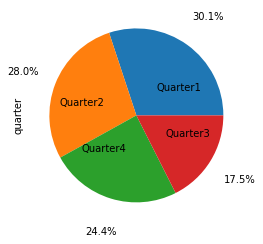

In [21]:
garment["quarter"].value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=1.40, labeldistance=.4)
plt.show()

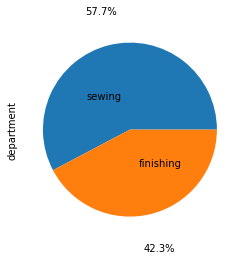

In [22]:
garment["department"].value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=1.40, labeldistance=.4)
plt.show()

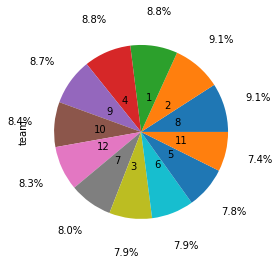

In [23]:
garment["team"].value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=1.40, labeldistance=.4)
plt.show()

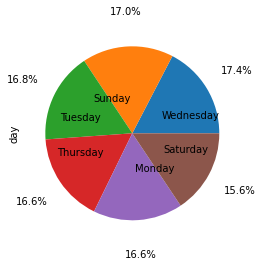

In [24]:
garment["day"].value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=1.40, labeldistance=.4)
plt.show()

In [25]:
garment['date'] = pd.to_datetime(garment['date'])
garment.set_index('date', drop=False, inplace=True)
garment.sample()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,overtime_in_hours
date,,,,,,,,,,,,,,,,
2015-02-01,2015-02-01,Quarter1,sewing,Sunday,8,0.6,24.26,1196.0,6600,0,0.0,0,0,55.0,0.466821,110.0


In [26]:
garment['month'] = garment['date'].dt.month_name()
garment.sample()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,overtime_in_hours,month
date,,,,,,,,,,,,,,,,,
2015-02-25,2015-02-25,Quarter4,sewing,Wednesday,9,0.75,18.79,1085.0,6240,56,0.0,0,1,52.0,0.970817,104.0,February


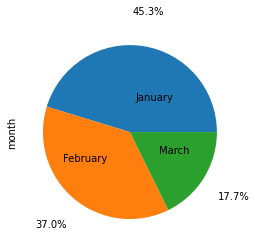

In [27]:
garment["month"].value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=1.40, labeldistance=.4)
plt.show()

In [28]:
cat = ["quarter", "department", "day", "month", "team", "no_of_style_change"]
contin = ["targeted_productivity", "smv", "wip", "over_time", "incentive",
        "idle_time", "no_of_workers", "actual_productivity"]

In [29]:
contin

['targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'no_of_workers',
 'actual_productivity']

C:\Users\admin\AppData\Local\Temp\ipykernel_10116\115922305.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hist = df_hist.append(last, ignore_index= True)
C:\Users\admin\AppData\Local\Temp\ipykernel_10116\115922305.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hist = df_hist.append(last, ignore_index= True)
C:\Users\admin\AppData\Local\Temp\ipykernel_10116\115922305.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hist = df_hist.append(last, ignore_index= True)
C:\Users\admin\AppData\Local\Temp\ipykernel_10116\115922305.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hist = df_hist.append(last, ignore_i

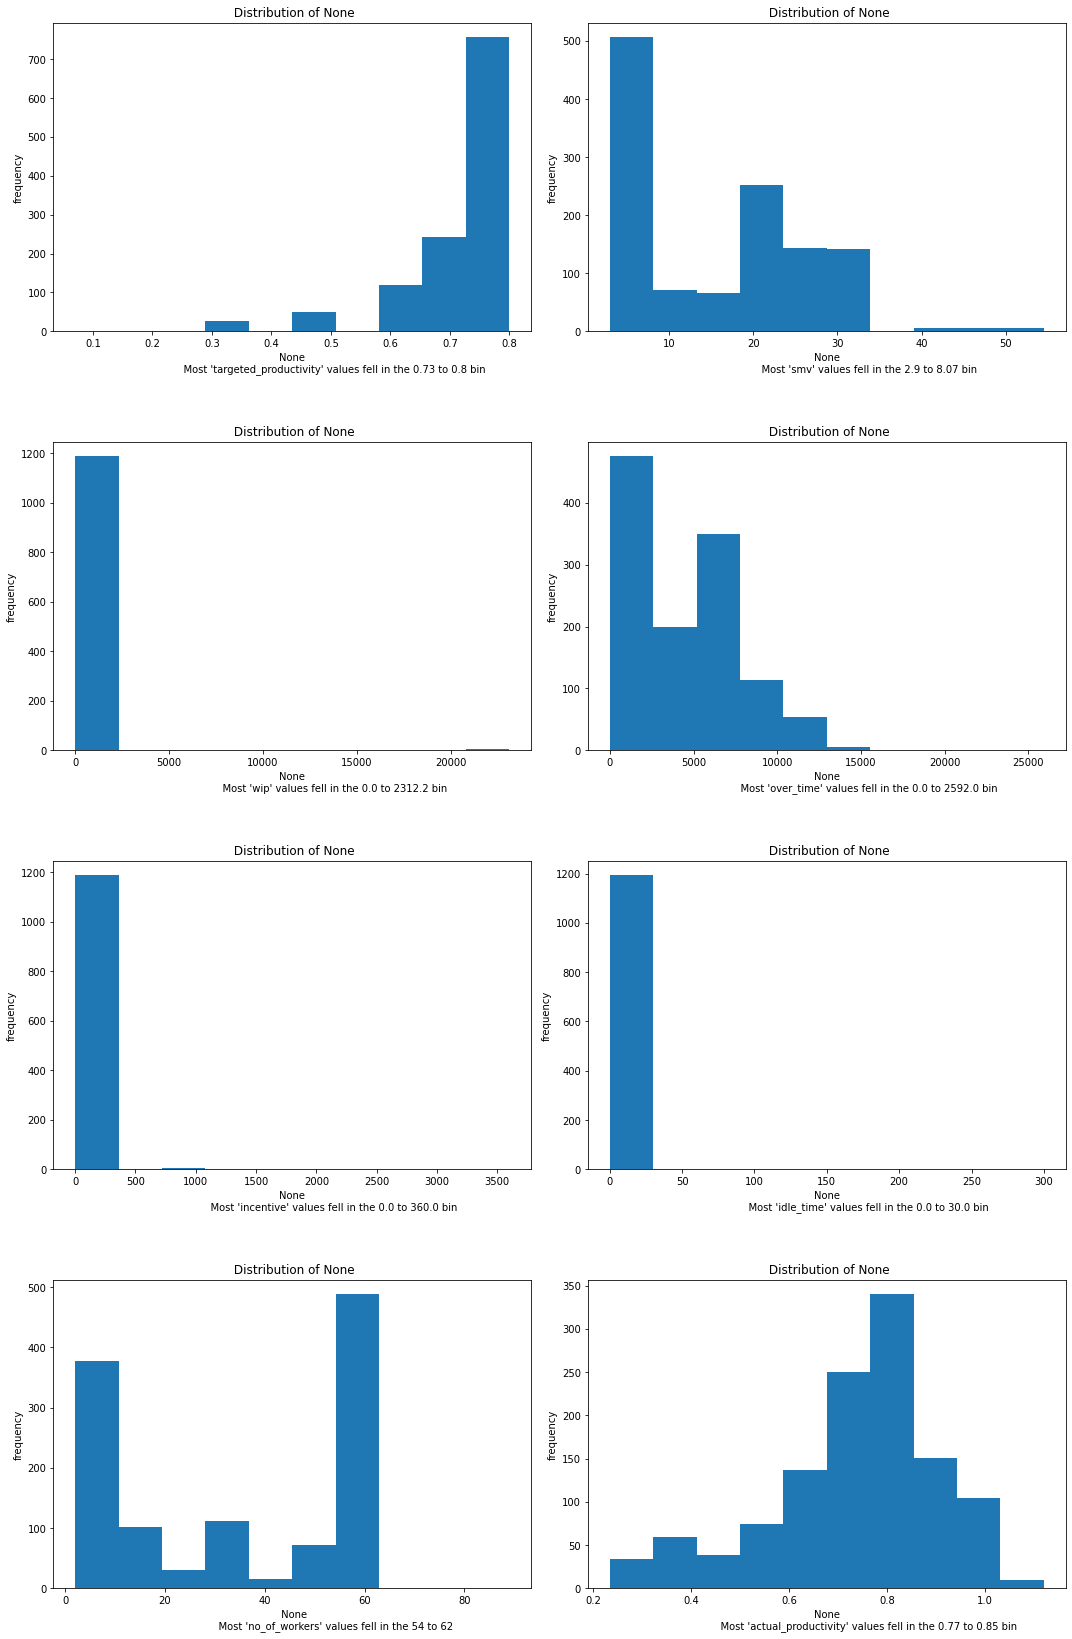

In [30]:
fig,axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))

for i, ax in enumerate(axes.ravel()):
    (n, bins, patches) = ax.hist(garment[contin[i]], bins= 10)
    ax.set_title(f" Distribution of { title(contin[i])}")
    ax.set_ylabel("frequency")
    
    #creating a dataframe with the values of bin edges
    df_hist = pd.DataFrame(data=n, columns= ['bin_values'])
    df_hist['left_bin_edge'] = bins[0: -1]
    df_hist
    last = {
        'bin_values' : 0,
        'left_bin_edge' : bins[-1]
    }
    df_hist = df_hist.append(last, ignore_index= True)
    
    #to print observations below histogram
    for idx in df_hist.index:
        if df_hist.loc[idx, 'bin_values'] == df_hist['bin_values'].max():
            left_edge = df_hist.loc[idx, 'left_bin_edge']
            right_lim = df_hist.loc[idx+1, 'left_bin_edge']
            
            if contin[i] == 'no_of_workers' or contin[i] == 'idle_men':
                ax.set_xlabel(f''' {title(contin[i])}
                            Most '{contin[i]}' values fell in the { int(left_edge)} to {int(right_lim)}''')
            else:
                ax.set_xlabel(f'''{title(contin[i])}
                            Most '{contin[i]}' values fell in the { round(left_edge,2)} to { round(right_lim,2)} bin ''')
fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

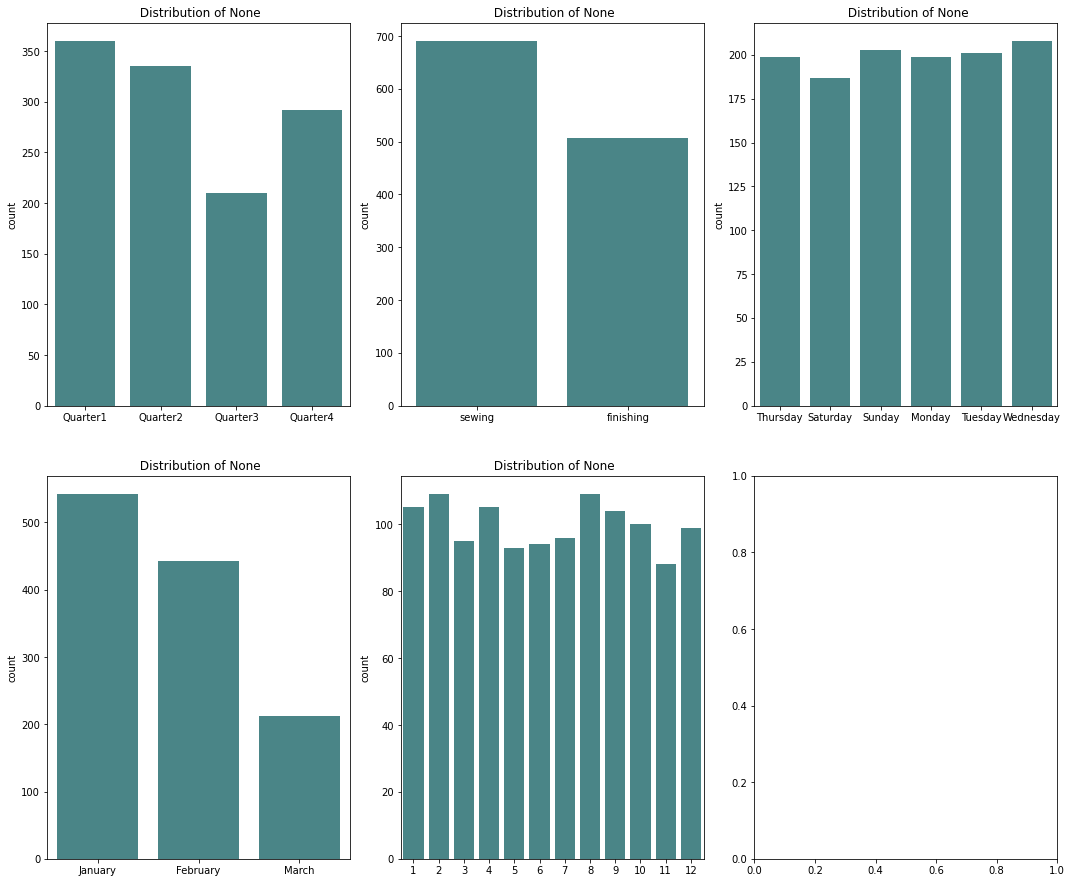

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
    if i < 5:
        sns.countplot(x=garment[cat[i]], ax=ax, color="#408E91")
        ax.set_title(f" Distribution of {title(cat[i])}")
        ax.set_xlabel(title(cat[i]))
        ax.set_ylabel("count")

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

Quarter one had the most records in the dataset.

There were more records related to the sewing department than the finishing department.

The day of the week with the most records is Wednesday.

Teams 2 and 8 appeared more frequently than other teams in the dataset.

For most records, the number of changes in the style of a particular product was 0.

Target vs Actual

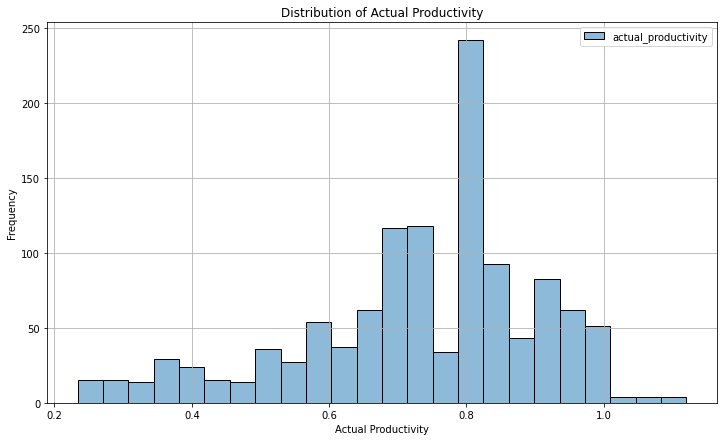

In [32]:
fig_dims = (12, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=garment[['actual_productivity']], ax=ax, color='green')
ax.set_xlabel('Actual Productivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Actual Productivity')
ax.grid(True)
plt.show()

Comparison between Actual Productivity and incentives over time

In [33]:
garment.reset_index(drop=True, inplace=True)

In [34]:
garment.sample(3)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,overtime_in_hours,month
15,2015-01-01,Quarter1,finishing,Thursday,4,0.75,3.94,0.0,2160,0,0.0,0,0,18.0,0.593056,36.0,January
954,2015-02-26,Quarter4,sewing,Thursday,2,0.70,30.33,398.0,6960,0,0.0,0,1,58.0,0.662379,116.0,February
294,2015-01-17,Quarter3,sewing,Saturday,3,0.60,22.52,1140.0,10170,30,0.0,0,0,57.0,0.600292,169.5,January


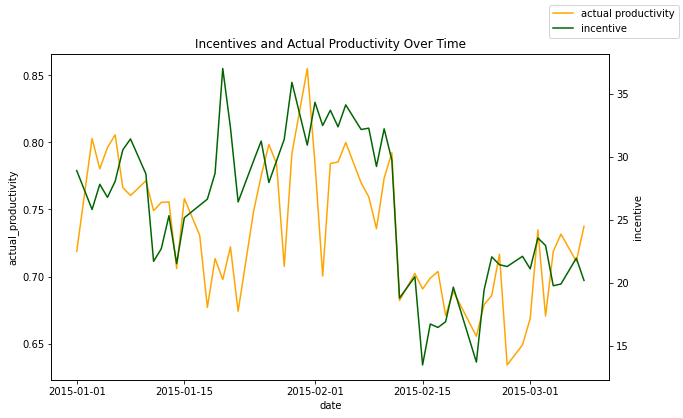

In [35]:
ap_incentive = garment[garment.date <= pd.to_datetime('2015-03-08')]
ap_incentive
plt.figure(figsize=(10,6))

line1 = sns.lineplot(x='date', y='actual_productivity', data=ap_incentive, ci= None, color='orange', legend=False, label = 'actual productivity' )
ax2 = line1.twinx()

line2 = sns.lineplot(x='date', y='incentive', data=ap_incentive, ci=None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')
line1.figure.legend()

plt.title("Incentives and Actual Productivity Over Time")
plt.show()

Incentives and actual productivity show similar trends, with periods of low incentives generally coinciding with periods of low actual productivity, and peaks in productivity generally coinciding with peaks in incentives

Comparison between Actual and Targeted Productivity Over Time

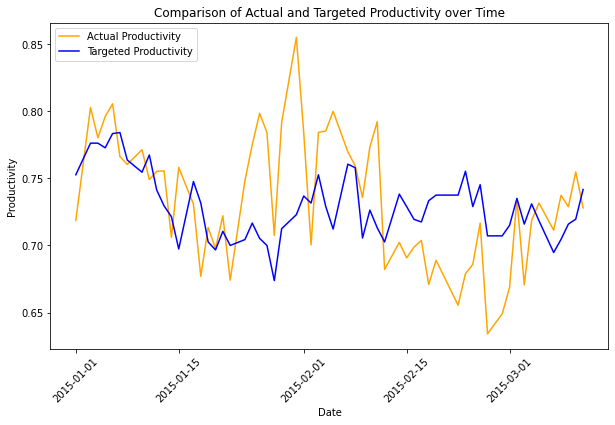

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='actual_productivity', data=garment, ci=None, color='orange')
sns.lineplot(x='date', y='targeted_productivity', data=garment, ci=None, color='blue')

# Add axis labels and ticks
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.xticks(rotation=45)

# Use a consistent color scheme
plt.legend(labels=['Actual Productivity', 'Targeted Productivity'], loc='upper left')
plt.title('Comparison of Actual and Targeted Productivity over Time')

# Add comments
plt.show()

Actual productivity generally exceeded targeted productivity except from mid February to beginning of March where targets were not being met.
We can observe the same in the graph above whereby the actual productivity had a big difference from 25th January to 8th February. There was a massive drop from 8th February to 8th March in the actual productivity but however, the targeted productivity was still raging at a moderate level. Therefore, we can still assume that the actual productivity is higher than the targeted productivity based on the graph. Although the actual productivity seems to be more volatile compared to the targeted productivity, the graph gives us a clear indication that the actual productivity was higher than the targeted productivity on many occasions within the timeframe.

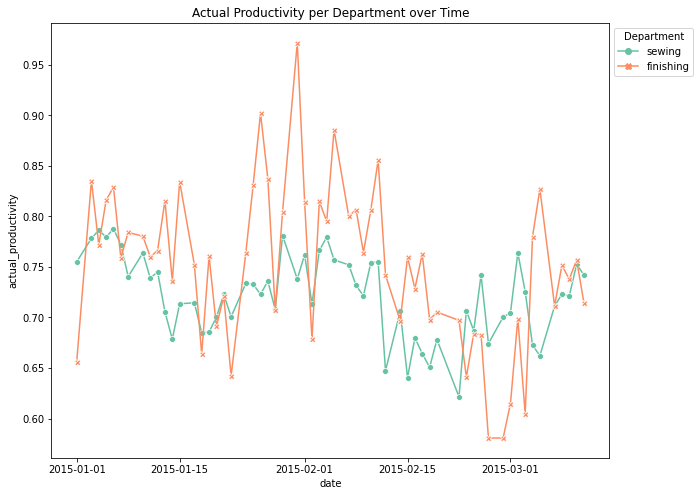

In [37]:
# Plot the actual productivity lines for each department
plt.figure(figsize=(10,8))
sns.lineplot(x='date', y='actual_productivity', hue='department', style='department', data=garment, ci=None, markers=True, dashes=False, palette='Set2')

# Add a legend
plt.legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))

# Add a title
plt.title('Actual Productivity per Department over Time')

# Add comments
plt.show()

The finishing department generally had higher actual productivity than the sewing department.

Idle time by department

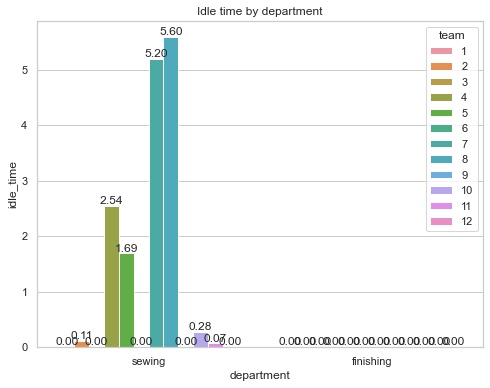

In [38]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='department', y='idle_time', hue='team', data=garment, ci=None, ax=ax)
ax.set_title("Idle time by department")

for p in ax.containers:
    ax.bar_label(p, label_type='edge',labels=[f'{x:.2f}' for x in p.datavalues], fontsize=12)
plt.show()

Only the sewing department had idle time, with team 8's sewing division recording the highest idle time

Idle men by department

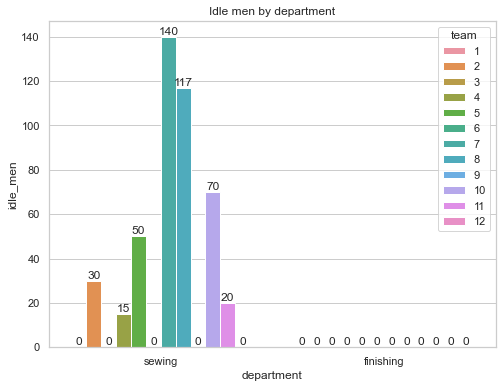

In [39]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='department', y='idle_men', hue='team', data=garment, ci=None, estimator=sum, ax=ax)
ax.set_title("Idle men by department")

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=12)
plt.show()

Only the sewing department had idle men, with team 7's sewing division recording the highest number of idle men.

Department and team with more style changes

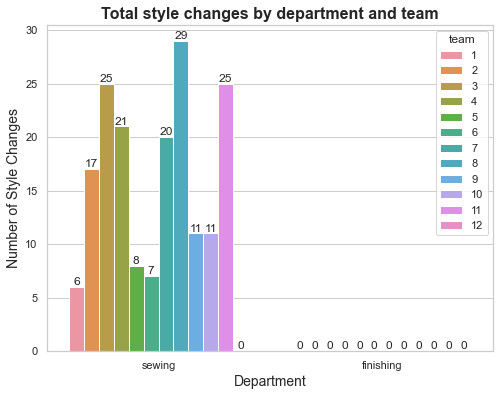

In [40]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x='department', y='no_of_style_change', hue='team', data=garment, ci=None, estimator=sum, ax=ax)

ax.set_title("Total style changes by department and team", fontsize=16, fontweight='bold')
ax.set_xlabel("Department", fontsize=14)
ax.set_ylabel("Number of Style Changes", fontsize=14)

# Add data labels to the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=12)

plt.show()

Only the sewing department had style changes, with team 8's sewing division recording the highest number of style changes.

Average Productivity of each team

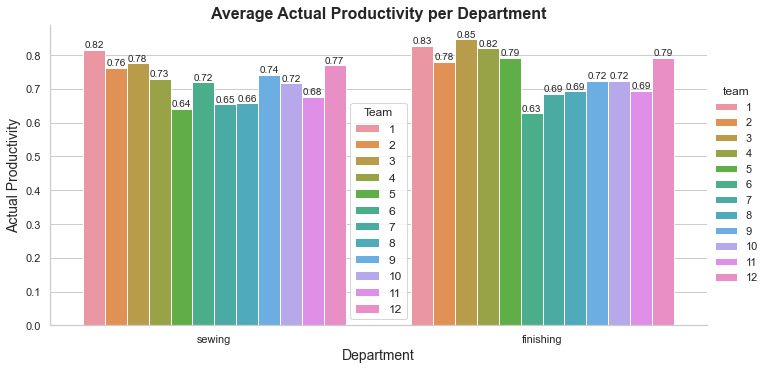

In [41]:
sns.set_style('whitegrid')

# Create the plot using catplot and get the axis object
g = sns.catplot(data=garment, x='department', y='actual_productivity', hue='team', ci=None, kind='bar', height=5, aspect=2)

# Set the title, labels, and legend
plt.title("Average Actual Productivity per Department", fontsize=16, fontweight='bold')
plt.xlabel("Department", fontsize=14)
plt.ylabel("Actual Productivity", fontsize=14)
plt.legend(title="Team", title_fontsize=12, fontsize=12)

# Add data labels to the bars
ax = g.ax
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{x:.2f}' for x in p.datavalues], fontsize=10)

plt.show()

Team 1's sewing division had the highest average actual productivity in the sewing department, while in the finishing department team 3's finishing division had the highest.

Team 5's sewing division had the lowest average actual productivity in the sewing department, while in the finishing department team 6's finishing division had the highest.

Outlier Removel and Detection

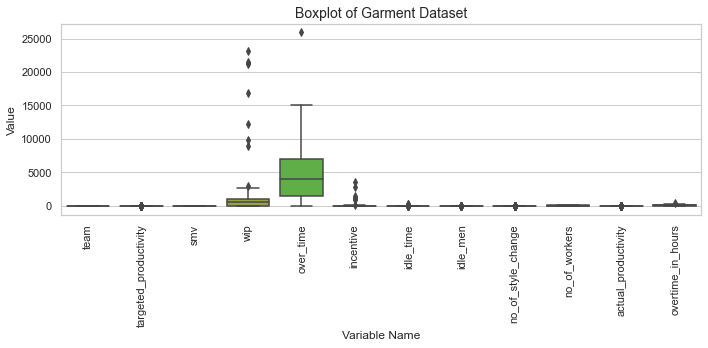

In [42]:
plt.figure(figsize=(10, 5))
p = sns.boxplot(data=garment, orient='v', width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Variable Name', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Boxplot of Garment Dataset', fontsize=14)
plt.tight_layout()
plt.show()

In [43]:
garment.skew().sort_values(ascending=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_10116\798929466.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  garment.skew().sort_values(ascending=True)


targeted_productivity    -2.144150
actual_productivity      -0.807492
no_of_workers            -0.112274
team                      0.009848
smv                       0.405937
over_time                 0.673287
overtime_in_hours         0.673287
no_of_style_change        2.942506
idle_men                  9.855079
wip                      10.852386
incentive                15.790746
idle_time                20.545425
dtype: float64

In [44]:
garment.drop(columns=['idle_men'], inplace=True, axis=1)
garment.drop(columns=['idle_time'], inplace=True, axis=1)
garment.drop(columns=['overtime_in_hours'], inplace=True, axis=1)

In [45]:
Q1 = garment.incentive.quantile(0.25)
Q3 = garment.incentive.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
garment[(garment.incentive<lower_limit)|(garment.incentive>upper_limit)]
garment = garment[(garment.incentive>lower_limit)&(garment.incentive<upper_limit)]

In [46]:
Q1 = garment.targeted_productivity.quantile(0.25)
Q3 = garment.targeted_productivity.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
garment[(garment.targeted_productivity<lower_limit)|(garment.targeted_productivity>upper_limit)]
garment = garment[(garment.targeted_productivity>lower_limit)&(garment.targeted_productivity<upper_limit)]

In [47]:
Q1 = garment.wip.quantile(0.25)
Q3 = garment.wip.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
garment[(garment.wip<lower_limit)|(garment.wip>upper_limit)]
garment = garment[(garment.wip>lower_limit)&(garment.wip<upper_limit)]

Removing Outler from Incentive column

In [48]:
garment.skew().sort_values(ascending=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_10116\2662259393.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  garment.skew().sort_values(ascending=True)


targeted_productivity   -0.960831
actual_productivity     -0.889850
no_of_workers           -0.093453
team                    -0.010025
wip                      0.321918
smv                      0.419939
over_time                0.526107
incentive                0.797690
no_of_style_change       3.092460
dtype: float64

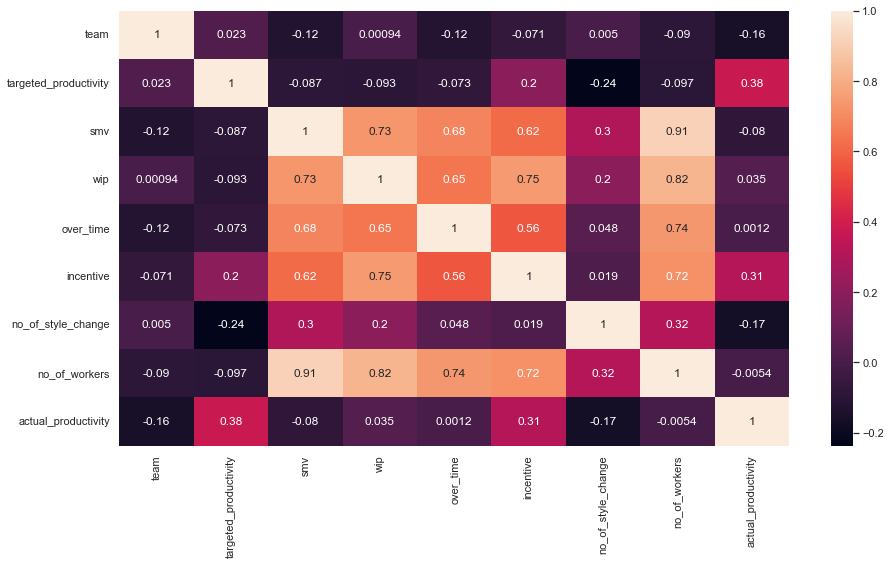

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(garment.corr(),annot=True)
plt.show()

-Actual productivity, the target column, has the highest correlation (moderate positive correlation of 0.38) with targeted productivity.

-Strong positive correlations(>0.5):

standard minute value has strong positive correlations of 0.91 with number of workers.
standard minute value has strong positive correlations of 0.73 with wip (working in progress).
standard minute value has strong positive correlations of 0.62 with incentive.
standard minute value has strong positive correlations of 0.68 with Over time.
Working in Progress has strong positive correlations of 0.82 with number of workers.
Working in Progress has strong positive correlations of 0. 75 with Incentives.
Working in Progress has strong positive correlations of 0. 65 with Over time.
Over time has strong positive correlations of 0. 74 with No of workers.
Over time has strong positive correlations of 0. 56 with Incentive.
Incentive has strong positive correlations of 0. 72 with No of Workers.


In [50]:
garment = pd.get_dummies(garment, columns=cat)
print(garment.sample(4))

          date  targeted_productivity    smv     wip  over_time  incentive  \
298 2015-01-17                   0.80   4.15     0.0       1260          0   
553 2015-02-01                   0.75  29.12  1282.0       6960         45   
637 2015-02-07                   0.80  22.52  1186.0       6900        113   
283 2015-01-17                   0.80  11.41  1067.0       5490         63   

     no_of_workers  actual_productivity  quarter_Quarter1  quarter_Quarter2  \
298            7.0             0.313853                 0                 0   
553           58.0             0.750593                 1                 0   
637           58.0             1.000019                 1                 0   
283           31.0             0.800344                 0                 0   

     ...  team_6  team_7  team_8  team_9  team_10  team_11  team_12  \
298  ...       0       0       0       0        0        1        0   
553  ...       0       0       0       1        0        0        0   


In [51]:
garment.sample(4)

,date,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
59,2015-01-04,0.70,45.67,884.0,6960,26,58.0,0.603432,1,0,...,0,0,0,0,0,0,0,1,0,0
782,2015-02-15,0.80,22.52,12.0,6900,0,58.0,0.432123,0,0,...,0,0,0,0,0,0,0,1,0,0
991,2015-03-01,0.75,18.79,895.0,6240,34,52.0,0.750396,1,0,...,0,0,0,1,0,0,0,1,0,0
537,2015-01-31,0.70,50.89,282.0,5880,56,59.0,0.656764,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
garment.drop(columns=['date','month_February', 'month_January', 'month_March'], inplace=True, axis=1)

print(garment.columns)

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'no_of_workers', 'actual_productivity', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'department_finishing', 'department_sewing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'no_of_style_change_0', 'no_of_style_change_1', 'no_of_style_change_2'],
      dtype='object')


In [53]:
x = garment.drop(columns=['actual_productivity'], axis=1)
y = garment.actual_productivity
x.shape, y.shape

((1098, 33), (1098,))

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])
x.head()

,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
0,0.849923,1.016663,0.932878,0.767795,2.333986,1.099960,1.496308,-0.606112,-0.464701,-0.569638,...,-0.291514,-0.295176,3.176619,-0.316544,-0.309529,-0.272698,-0.307759,0.358425,-0.309529,-0.164706
1,0.000000,-1.008510,-1.013111,-1.089172,-0.863659,-1.188306,1.496308,-0.606112,-0.464701,-0.569638,...,-0.291514,-0.295176,-0.314800,-0.316544,-0.309529,-0.272698,-0.307759,0.358425,-0.309529,-0.164706
2,0.849923,-0.327680,0.686995,-0.269922,0.767793,-0.156343,1.496308,-0.606112,-0.464701,-0.569638,...,-0.291514,-0.295176,-0.314800,-0.316544,-0.309529,3.667065,-0.307759,0.358425,-0.309529,-0.164706
3,0.849923,-0.327680,0.686995,-0.269922,0.767793,-0.156343,1.496308,-0.606112,-0.464701,-0.569638,...,-0.291514,-0.295176,-0.314800,-0.316544,-0.309529,-0.272698,3.249291,0.358425,-0.309529,-0.164706
4,0.849923,0.992966,1.041769,-0.797883,0.767793,0.965356,1.496308,-0.606112,-0.464701,-0.569638,...,3.430371,-0.295176,-0.314800,-0.316544,-0.309529,-0.272698,-0.307759,0.358425,-0.309529,-0.164706


In [56]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(878, 33)
(220, 33)
(878,)
(220,)


In [58]:
# import scipy as sp
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from math import sqrt
# from sklearn.metrics import mean_absolute_percentage_error

In [59]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model_1.score(x_test, y_test)
cross_validation_score  = cross_val_score(model_1, x_train, y_train, cv=5)

In [60]:
predictions = model_1.predict(x_train)
errors = abs(predictions - y_train)
print("Mean Absolute Error : ", round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error :  0.09 degrees.


In [61]:
mape = 100 * (errors / y_train)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.85 %.


In [62]:
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)
print('Coefficient of determination:', r2)
print('Cross-validation scores:', cross_validation_score)

Mean squared error: 0.018426107959201788
Root mean squared error: 0.135742800763804
Coefficient of determination: 0.3021950414345199
Cross-validation scores: [0.32872384 0.28113265 0.21189459 0.34583963 0.28290731]


In [63]:
# plt.scatter(y_test, y_pred, label='Linear Regression')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Targeted_Productivity')
# plt.ylabel('Actual_Productivity')
# plt.title('Target vs Actual Productivity')
# plt.show()

In [64]:
# score = model_1.score(x_test, y_test)
# print("Model Score", score)

Random Forest

In [65]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [66]:
predictions = rf.predict(x_train)
errors = abs(predictions - y_train)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.03 degrees.


In [67]:
mape = 100 * (errors / y_train)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.26 %.


In [68]:
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)
print('Coefficient of determination:', r2)

Mean squared error: 0.018426107959201788
Root mean squared error: 0.135742800763804
Coefficient of determination: 0.3021950414345199


Ridge

In [69]:
alphas = [0.1, 1, 10]
model_ridge = RidgeCV(alphas=alphas, cv=5)
model_ridge.fit(x_train, y_train)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [70]:
predictions = model_ridge.predict(x_train)
errors = abs(predictions - y_train)
print("Mean Absolute Error : ", round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error :  0.09 degrees.


In [71]:
maps = 100 * (errors / y_train)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.26 %.


In [73]:
jupyter nbconvert --to HTML garments.ipynb

SyntaxError: invalid syntax (1436274822.py, line 1)